In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [2]:
sns.set_context('paper')

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [4]:
nx = 512
ny = 612
nz = 76
dt = 600
z1 = 25 # Zl[25] = -99 m
z2 = 37 # Zl[37] = -197.2 m
z3 = 45 # Zl[45] = -292.2 m
z4 = 55 # Zl[55] = -508.2 m
levs = [z1,z2,z3,z4]
days = [144-1,288-1,(144*3)-1,(144*4)-1,(144*5)-1] # time index day 1, 2, ...
nlevs = len(levs) # calc variance at 4 depth levels
ndays = len(days) # calc variance after day 1, day 2, ... day 5


depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

In [5]:
var = np.load('../wvar_2d_febTS_.npz')
varB = np.load('../wvar_2d_baro_.npz')
varA = np.load('../wvar_2d_augTS_.npz')

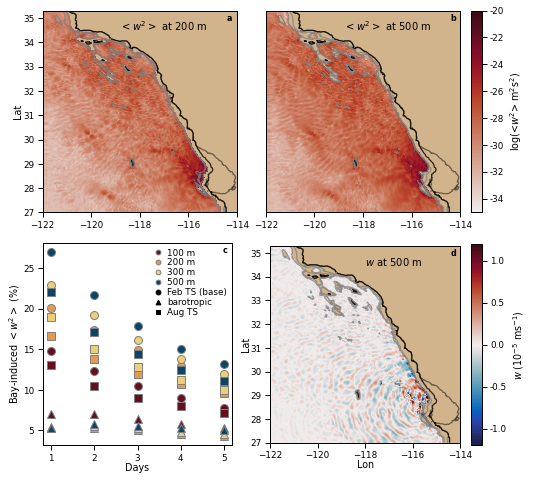

In [6]:
fig = plt.figure(figsize=(7.48,8))
gs0 = GridSpec(2,1 ,height_ratios=[1,1], hspace=0.15 )
gs1 = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0], wspace=0.15)
gs2 = GridSpecFromSubplotSpec(1, 2, width_ratios=[1,1],wspace=0.2, subplot_spec=gs0[1])

ax1 = plt.subplot(gs1[0])
ax2 = plt.subplot(gs1[1])
ax3 = plt.subplot(gs2[0])
ax4 = plt.subplot(gs2[1])

ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(LON,LAT,np.ma.masked_array(np.log(var['var_dif'][0,1,...]), mask=mask[z2,...]),
                    cmap=cmo.cm.amp, vmin=-35, vmax=-20)
ax1.contour(lon,lat,depth_bay,levels=[0], colors=['k'], alpha=0.5)
ax1.contour(lon,lat,depth_nob,levels=[0, 200,500], colors=['k','0.5','0.5'], alpha=0.8)
ax1.set_aspect(1)
ax1.set_ylabel('Lat', labelpad=0)

ax2.set_facecolor('tan')
pc2 = ax2.pcolormesh(LON,LAT,np.ma.masked_array(np.log(var['var_dif'][0,3,...]), mask=mask[z4,...]),
                    cmap=cmo.cm.amp, vmin=-35, vmax=-20)
ax2.contour(lon,lat,depth_bay,levels=[0], colors=['k'], alpha=0.5)
ax2.contour(lon,lat,depth_nob,levels=[0, 200, 500], colors=['k','0.5','0.5',], alpha=0.8)
ax2.set_yticks([])
ax2.set_aspect(1)
cbar_ax = fig.add_axes([0.92, 0.53, 0.02, 0.35]) 
cb = fig.colorbar(pc2,
                  cax=cbar_ax, orientation='vertical', 
                  format='%1.0f', label='log(<$w^2$> m$^2$s$^{2}$)', pad=0,
                  )
# ---- w ---------------------
ax4.set_facecolor('tan')
wbay = ds['WVEL'][244,z4,...]
wnb = ds2['WVEL'][244,z4,...]
wdif = np.ma.masked_array(wbay-wnb, mask=mask[z4,...])
pc4 = ax4.pcolormesh(LON,LAT,1E5*wdif,cmap=cmo.cm.balance, vmin=-1.2, vmax=1.2)
ax4.contour(lon,lat,depth_bay,levels=[0], colors=['k'], alpha=0.5)
ax4.contour(lon,lat,depth_nob,levels=[0, 200, 500], colors=['k','0.5','0.5'], alpha=0.8)
ax4.set_aspect(1)
cbar_ax4 = fig.add_axes([0.92, 0.125, 0.02, 0.35]) 
cb = fig.colorbar(pc4,
                  cax=cbar_ax4, orientation='vertical', 
                  format='%1.1f', label='$w$ (10$^{-5}$ ms$^{-1}$)', pad=0,
                  )
ax4.set_xlabel('Lon', labelpad=0.1)
ax4.set_ylabel('Lat', labelpad=0.1)

# - --
mean_var_dif = np.empty((ndays,nlevs))
mean_var_noSVB = np.empty((ndays,nlevs))

mean_var_difB = np.empty((ndays,nlevs))
mean_var_noSVBB = np.empty((ndays,nlevs))

mean_var_difA = np.empty((ndays,nlevs))
mean_var_noSVBA = np.empty((ndays,nlevs))

for ii in range(ndays):
    for zz,kk in zip(levs,range(nlevs)):
        masked_area = np.ma.masked_array(ds2.rA,mask=mask[zz,:,:])
        mean_var_dif[ii,kk] = np.nansum(var['var_dif'][ii,kk,...]*masked_area)/np.nansum(masked_area)
        mean_var_noSVB[ii,kk] = np.nansum(var['var_NB'][ii,kk,...]*masked_area)/np.nansum(masked_area)
        mean_var_difB[ii,kk] = np.nansum(varB['var_dif_B'][ii,kk,...]*masked_area)/np.nansum(masked_area)
        mean_var_noSVBB[ii,kk] = np.nansum(varB['var_NB_B'][ii,kk,...]*masked_area)/np.nansum(masked_area)
        mean_var_difA[ii,kk] = np.nansum(varA['var_dif_A'][ii,kk,...]*masked_area)/np.nansum(masked_area)
        mean_var_noSVBA[ii,kk] = np.nansum(varA['var_NB_A'][ii,kk,...]*masked_area)/np.nansum(masked_area)

colors= ["#660d20", "#e59a52", "#edce79", "#094568", "#e1c59a"] # Navajo from MetBrewer
days = [1,2,3,4,5]
for ii, col in zip(range(nlevs), colors):
    ax3.plot(days,100*mean_var_dif[:,ii]/mean_var_noSVB[:,ii],'o', 
             markerfacecolor=col, markeredgecolor='0.5', markersize=8)
    ax3.plot(days,100*mean_var_difB[:,ii]/mean_var_noSVBB[:,ii],'^', 
             markerfacecolor=col, markeredgecolor='0.5', markersize=8)
    ax3.plot(days,100*mean_var_difA[:,ii]/mean_var_noSVBA[:,ii],'s', 
             markerfacecolor=col, markeredgecolor='0.5', markersize=8)
   
ax3.set_xlabel('Days', labelpad=0.1)
ax3.set_ylabel('Bay-induced $<w^2>$ (%)', labelpad=0.1)

legend_elements = [Line2D([0],[0],marker='o',color='w',markerfacecolor=colors[0],label='100 m',markeredgecolor='0.5'),
                   Line2D([0],[0],marker='o',color='w',markerfacecolor=colors[1],label='200 m',markeredgecolor='0.5'),
                   Line2D([0],[0],marker='o',color='w',markerfacecolor=colors[2],label='300 m',markeredgecolor='0.5'),
                   Line2D([0],[0],marker='o',color='w',markerfacecolor=colors[3],label='500 m',markeredgecolor='0.5'),
                   Line2D([0],[0],marker='o',color='w',markerfacecolor='k',label='Feb TS (base)',markeredgecolor='k'),
                   Line2D([0],[0],marker='^',color='w',markerfacecolor='k',label='barotropic',markeredgecolor='k'),
                   Line2D([0],[0],marker='s',color='w',markerfacecolor='k',label='Aug TS',markeredgecolor='k'),
                   ]
ax3.legend(handles=legend_elements,handletextpad=0.1, labelspacing=0.1, borderpad=0.1, framealpha=0 )

for ax in ax1,ax2,ax4:
    ax.set_xlim(-122,-114)
    ax.set_ylim(27,35.3)

ax1.text(0.4,0.9, '$<w^2>$ at 200 m' ,fontsize=10, transform=ax1.transAxes)
ax2.text(0.4,0.9, '$<w^2>$ at 500 m' ,fontsize=10, transform=ax2.transAxes)
ax4.text(0.5,0.9, '$w$ at 500 m' ,fontsize=10, transform=ax4.transAxes)

ax1.text(0.95,0.95, 'a' ,fontsize=8, transform=ax1.transAxes, fontweight='bold')
ax2.text(0.95,0.95, 'b' ,fontsize=8, transform=ax2.transAxes, fontweight='bold')
ax3.text(0.95,0.95, 'c' ,fontsize=8, transform=ax3.transAxes, fontweight='bold')
ax4.text(0.95,0.95, 'd' ,fontsize=8, transform=ax4.transAxes, fontweight='bold')

plt.savefig('figure8.png', dpi=500, bbox_inches='tight',facecolor='white' )

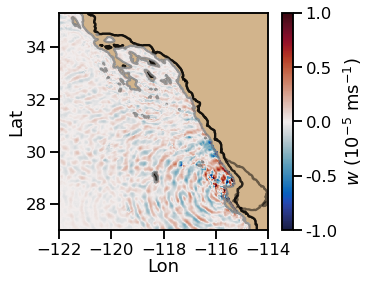

In [21]:
sns.set_context('talk')
fig, ax4 = plt.subplots(1,1, figsize=(5,4))

# ---- w ---------------------
ax4.set_facecolor('tan')
wbay = ds['WVEL'][244,z4,...]
wnb = ds2['WVEL'][244,z4,...]
wdif = np.ma.masked_array(wbay-wnb, mask=mask[z4,...])
pc4 = ax4.pcolormesh(LON,LAT,1E5*wdif,cmap=cmo.cm.balance, vmin=-1., vmax=1.)
ax4.contour(lon,lat,depth_bay,levels=[0], colors=['k'], alpha=0.5)
ax4.contour(lon,lat,depth_nob,levels=[0, 500], colors=['k','0.5','0.5'], alpha=0.8)
ax4.set_aspect(1)
cb = plt.colorbar(pc4, orientation='vertical', 
                  format='%1.1f', label='$w$ (10$^{-5}$ ms$^{-1}$)')
ax4.set_xlabel('Lon', labelpad=0.1)
ax4.set_ylabel('Lat', labelpad=0.1)
ax4.set_xlim(-122,-114)
ax4.set_ylim(27,35.3)
ax4.set_aspect(1)
plt.savefig('w_talk.png', dpi=500, bbox_inches='tight',facecolor='white' )